In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mbti_1.csv")

In [3]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


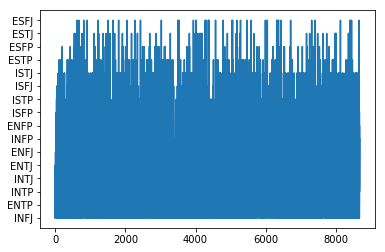

In [4]:
plt.plot(data['type'])

In [6]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [7]:
labels = data['type']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data['posts'], labels, test_size = 0.25)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6506,)
(2169,)
(6506,)
(2169,)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(stop_words='english')

In [14]:
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [16]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
score = accuracy_score(y_test, y_pred)

In [20]:
print("{:.3f} %".format(score*100))

65.330 %


In [21]:
print(confusion_matrix(y_test, y_pred))

[[ 16   6   0   0   0   0   0   0   2   2   2   1   0   1   1   0]
 [  2  93   1   8   0   0   0   0  19  19  10   5   0   0   1   3]
 [  2   5  24   5   0   0   1   0   2   3   7   3   0   0   0   1]
 [  0  13   0  91   0   0   0   1   6   8   8  24   0   0   1   3]
 [  0   0   0   0   1   0   0   1   1   4   1   1   0   0   0   0]
 [  0   2   0   0   0   0   0   0   3   2   1   1   0   0   0   0]
 [  0   2   1   1   0   0   3   0   0   1   0   1   0   0   0   0]
 [  0   0   0   2   1   0   0   6   2   6   1   0   0   0   0   0]
 [  4   8   5   8   0   0   0   0 253  52  22  13   3   3   2   2]
 [  3  17   2  12   1   0   0   1  35 372  17  19   1   3   4   2]
 [  2   6   1   6   0   0   0   0  28  22 169  25   1   1   1   3]
 [  0   6   0  15   0   0   0   2  19  27  23 251   2   3   0   3]
 [  0   0   0   0   0   0   0   0   5   9   1   6  22   1   0   0]
 [  1   0   1   4   1   0   0   2   6   8   2   2   0  28   1   3]
 [  0   2   1   0   0   0   0   0   5   3   7   7   0   0  24 